A basic circular barplot made with Python and Matplotlib

## Notebook Metadata

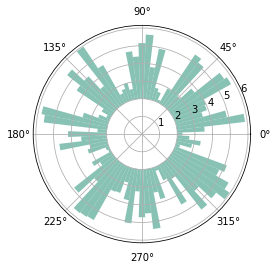

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 80
bottom = 2
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor("#69b3a2")
    bar.set_alpha(0.8)

plt.show()